# Read in data

In [1]:
import pandas as pd
import csv

path = '../../data/incels/all_comments.csv'
# data = pd.read_csv(path, engine='python', on_bad_lines=lambda x: print(x))
data = pd.read_csv(path, engine='python', on_bad_lines=lambda row: row[:-2].append(' '.join(row[-2:]))) # combine last 2 elements in a line mentioning Gulag
data['parsed_date'] = pd.to_datetime(data.date, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   type         object        
 1   forum        object        
 2   thread       object        
 3   username     object        
 4   date         object        
 5   content      object        
 6   parsed_date  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 333.7+ MB


In [8]:
data.forum.value_counts()

002-InceldomDiscussion    3725701
003-TheLounge             1794926
004-TheSewers              714612
001-MustReadContent         11476
005-BanAppeals               1514
Name: forum, dtype: int64

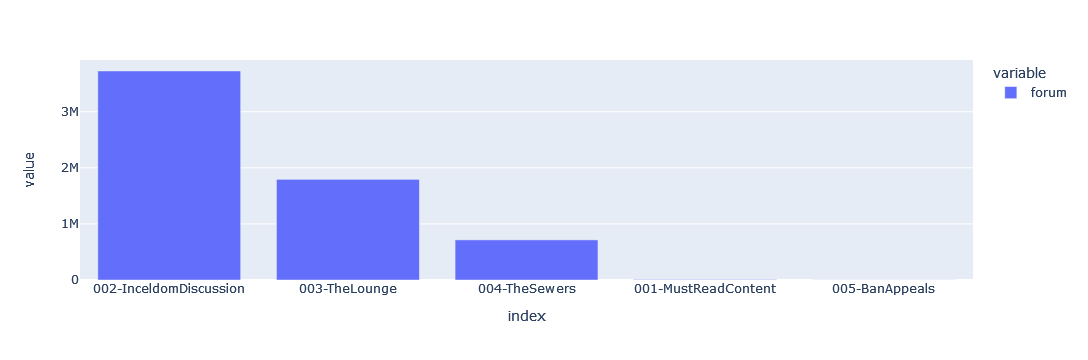

In [7]:
data.forum.value_counts().plot.bar()

In [3]:
print(len(data.thread.unique()))
data.thread.value_counts()[:20]

274341


0000001-Highestquantityofpostsin    57234
0004244-Mostpostsinonethread        32979
0000001-BanDiscussionMegathread     27543
0008013-Letsget15000postsonthist    16642
0002115-Arealmanschallenge100Kpo    13129
0000002-MusicMegathread              8562
0013844-pingpongtest                 3280
0024481-Sissyhypnothreadtojoinme     2682
0055061-Iwillapproach1000girlsan     2584
0000002-HighestquantityofXDsinas     1701
0005439-Dotpill6of100                1318
0000409-TópicoLusófonodoincelsco     1275
0000003-Introductions                1247
0072313-WORLDCUP2018MEGATHREAD       1121
0001675-TheproblemwithYerberito      1083
0070297-isolationthread               908
0003585-Polskiincelscomegathread      902
0018303-Postmaxxingisgettingouto      894
0000132-Iamthekingoftheforum          859
0014794-Sissyhypnothreadtojoinme      857
Name: thread, dtype: int64

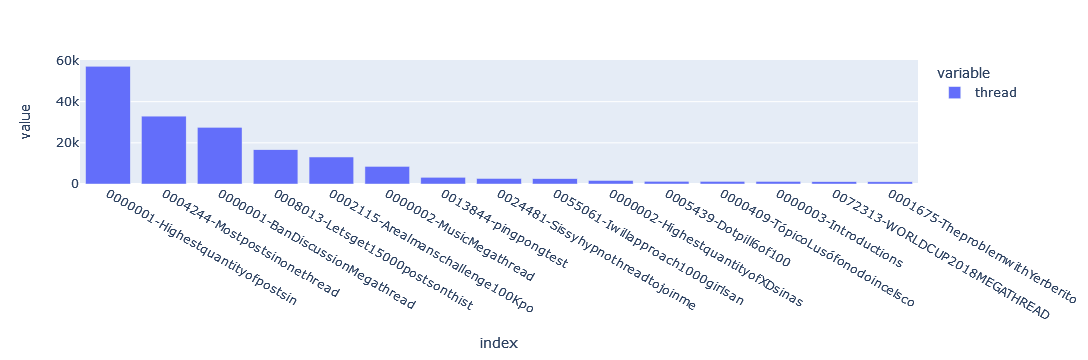

In [9]:
pd.options.plotting.backend = 'plotly'
data.thread.value_counts()[:15].plot.bar()

In [10]:
len(data.username.unique())

8469

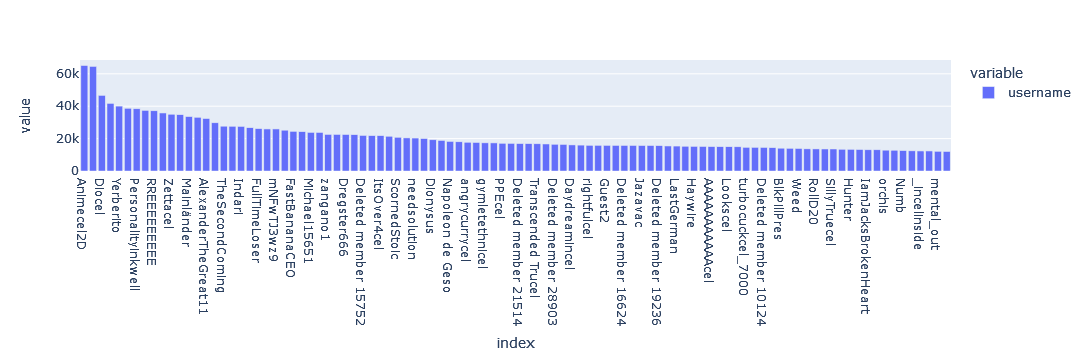

In [3]:
pd.options.plotting.backend = 'plotly'
data.username.value_counts()[:100].plot.bar()

In [6]:
data.username.value_counts().head(20)

Animecel2D             65096
unsettling             64547
Diocel                 46666
nihility               41736
Yerberito              40084
Cuyen                  38719
Personalityinkwell     38414
ihaveno1               37405
RREEEEEEEEE            37175
Insomniac              35820
Zettacel               35063
Blacktarpill           34754
Mainländer             33579
FinnCel                33162
AlexanderTheGreat11    32369
pp183                  29766
TheSecondComing        27673
Robtical               27610
Indari                 27509
your personality       26714
Name: username, dtype: int64

In [16]:
data[['date']]

,date
0,"Nov 20, 2020"
1,"Nov 20, 2020"
2,"Nov 20, 2020"
3,"Nov 20, 2020"
4,"Nov 20, 2020"
...,...
6248225,"Feb 20, 2018"
6248226,"Feb 21, 2018"
6248227,"Feb 21, 2018"
6248228,"Jan 24, 2020"


In [23]:
# pd.to_datetime(data.date, format="%b %-d, %Y")
pd.to_datetime(data.date, errors='coerce') # 5747 dates say 'Yesterday'

0         2020-11-20
1         2020-11-20
2         2020-11-20
3         2020-11-20
4         2020-11-20
             ...    
6248225   2018-02-20
6248226   2018-02-21
6248227   2018-02-21
6248228   2020-01-24
6248229   2020-07-19
Name: date, Length: 6248230, dtype: datetime64[ns]

In [22]:
data.date.str.contains('Yesterday').sum()

5747

In [ ]:
pd.options.plotting.backend = 'plotly'
data.sample(int(1e6)).parsed_date.plot.hist()

In [7]:
print(data.parsed_date.min())
data.parsed_date.max()

2017-11-07 00:00:00


Timestamp('2021-04-07 00:00:00')

# Look into removing \<username\>: said

In [7]:
pd.set_option('display.max_colwidth', None)

data.loc[data.content.str.contains('said: ').fillna(False), ['content', 'username']].sample(10)

,content,username
4192270,BenBerger said: Some goy cope by calling us gypsies. JFL at them. I dont quite look curry even if I am ugly,sub8male
1240890,Grothendieck said: O'pry is actually 183cm (6') not 6'1. I'd say O'Pry face mogs him to Oblivion. That's all matters. Face is the most important thing. Now that black guy is a famous NBA player so he outslays O'Pry for sure because of his gigachad status. But if both of them were unknown low status workers than O'Pry would get more bitches. His face is almost perfect. @OverBeforeItBegan Foids aren't as aspie as PSLers when it comes to facial features. They wouldn't notice much of a difference in facial attractiveness. What Oubre lacks in face he makes up x1000000000000000000000000000 in height,Deleted member 11159
1570312,"zangano1 said: No, and if you think they can you are a cuck",Hate_my_life
268925,Caesercel said: I would fuck your mother to become chad,trying to ascend
4639501,"FastBananaCEO said: She was a cunt. She was nice to all the foids and chads but she was a cunt to me and my incel/normie friends Yea of course not. Must coddle the ""QKWEEN PRETTY PRINCESSES"" Fuck but the ugly guys who get bullied and are suicidal they can rot and die right ? Fuck this world Romello Gaghan 2 said: go to SEA Not enough money plus i don't have the motivation to move out my bed let alone do that",iKillCucks
6191676,AAAAAAAAAAAcel said: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa Aaaaaaaaaaaaaa lllllllllllllllllllllllllllllllllll eeeeeeeeeeeeee rrrrrrrrrrrrrrrrrrrrrrr ttttttttttttttttttttttttttt,Animecel2D
2966859,Redpill Robert said: Should have raped. Obvious whore anyways. How are you going to rape a fat chick? If she overpowers you and gets on top you're double fucked. Dont be low iq tardcel bruh,EthnicelNL
4694706,NoCopeNoHope said: Jfl at this. Being male essentially meant being sent into meatgrinders for most of history. Most males were lucky if they reproduced. We were always disposable. A curse of evolution. Stratospheric IQ Humans have been at peace for only 8% of their existance. But be that as it may - its an unassailable fact that foids want the power of men but none of the responsibilities that come with it. They want to rule civilization but they dont (and didnt) want the responsibility of building it. Thats the definition of penis envy : wanting the perks of masculinity but not having the testicular fortitude to handle the responsibility,BabyFuck McGirlsex
4796788,"DoctorBlythe said: What documentaries do you like to watch? History Learn to imitate celebrities, learn to cook new foods, learn languages, listen to podcasts",FinnCel
3061001,Weed said: PM me all your slays Done.,itsOVER


In [8]:
data.content.str.contains('said: ').fillna(False).value_counts(normalize=True)

False    0.527706
True     0.472294
Name: content, dtype: float64

In [9]:
# Count how many have multiple said: occurrences
data.content.str.contains('said:.*said: ').fillna(False).value_counts()

False    5998164
True      250066
Name: content, dtype: int64

In [10]:
# Get usernames
usernames = set(data.username)
len(usernames)

8469

In [13]:
# Extract capitalized words before said: as other usernames
import re

pat = re.compile(r'((?:\b[A-Z][a-z]+ )*)said:|(\S*) said:')
matches = data.content.str.extract(pat)

KeyboardInterrupt: 

In [23]:
from tqdm.auto import tqdm
tqdm.pandas()

def extract_name(text):
    res = None
    match = re.search(pat, text)
    if match:
        res = [el for el in match.groups() if el]
    return res

# matches = data.iloc[:100].content.astype('str').progress_map(extract_name)
matches = data.content.astype('str').progress_map(extract_name)
matches

  0%|          | 0/6248230 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [19]:
re.search(pat, 'Incels said: something something zingbats said: something else').groups()

('Incels ', None)

In [20]:
re.search(pat, 'something').groups()

AttributeError: 'NoneType' object has no attribute 'groups'